In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Домашня робота № 4 «Моделювання динамічних систем на основі марківських процесів.»
## Варіант 1  
#### Завдання 1. Знайти розв’язок задачі Коші для звичайного диференційного рівняння першого порядку $y' = f(x,y)$ на відрізку $[a, b]$ з кроком $h=0.1$ за початкових умов $y(x_0) = y_0$:
Завдання 1-го варiанту:
Значення інтенсивностей переходів $λ_{ij}$:  
$
λ_{12} = 2год^{–1} ; λ_{13} = 1,5год^{–1} ; λ_{21} = 1,0год^{–1} ; λ_{24} = 0,02 год^{–1} ;\\
λ_{31} =1,2 год^{–1} ; λ_{34} = 0,03год^{–1} ; λ_{41} = 0,5год^{–1} .
$

Система управління мікрокліматом Smart-House може працювати в 4
режимах:
1) режим очікування;
2) режим регулювання температури (включається підсистема
кондиціювання повітря на обігрів або на охолодження)
3) режим регулювання вологості повітря (включається підсистема
парогенерації або підсистема вентиляції)
4) режим ремонту (вихід із ладу однієї із підсистем і неможливість
регулювання параметрів мікроклімату до закінчення ремонту).  

Система управління мікрокліматом Smart-House може функціонувати в 4
станах $S_1$ , $S_2$ , $S_3$ , $S_4$ . Вважається, що переходи здійснюються під впливом
найпростішого потоку подій. Інтенсивності переходів мають значення (взяти із
табл. 1).

### Розв’язання задачі
#### опис всіх станів, у яких може перебувати система:
- $S_1$ режим очікування;
- $S_2$ режим регулювання температури (включається підсистема
кондиціювання повітря на обігрів або на охолодження)
- $S_3$ режим регулювання вологості повітря (включається підсистема
парогенерації або підсистема вентиляції)
- $S_4$ режим ремонту (вихід із ладу однієї із підсистем і неможливість
регулювання параметрів мікроклімату до закінчення ремонту).

#### граф станів системи з позначеними інтенсивностями:
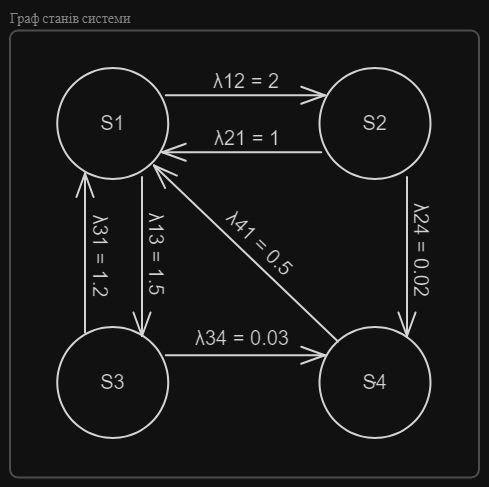

#### система диференціальних рівнянь Колмогорова:

$P_1(t)' = −(λ_{12} + λ_{13}) * P_1(t) + λ_{21} * P_2(t) + λ_{31} * P_3(t) + λ_{41} * P_4(t)$  
$P_2(t)' = λ_{12} * P_1(t) − (λ_{21} + λ_{24}) * P_2(t)$  
$P_3(t)' = λ_{13​} * P_1​(t) − (λ_{31} ​+λ_{34​}) * P_3​(t)$  
$P_4(t)' = λ_{24​} * P_2​(t) + λ_{34​} * P_3​(t) − λ_{41​} * P_4​(t)$  

#### система алгебраїчних рівнянь СЛАР для обчислення граничних ймовірностей:

$
\begin{cases}
0 = −(λ_{12} + λ_{13}) * P_1 + λ_{21} * P_2 + λ_{31} * P_3 + λ_{41} * P_4  \\
0 = λ_{12} * P_1 − (λ_{21} + λ_{24}) * P_2  \\
0 = λ_{13​} * P_1​ − (λ_{31} ​+ λ_{34​}) * P_3​  \\
0 = λ_{24​} * P_2​ + λ_{34​} * P_3​ − λ_{41​} * P_4​  \\
P_1 + P_2 + P_3 + P_4 = 1
\end{cases}
$

$
\begin{cases}
0 = −3.5P_1 + P_2 + 1.2P_3 + 0.5P_4  \\
0 = 2P_1 − 1.02P_2  \\
0 = 1.5P_1​ − 1.23P_3​  \\
0 = 0.02P_2​ + 0.03P_3​ − 0.5P_4​  \\
P_1 + P_2 + P_3 + P_4 = 1
\end{cases}
$

#### опис методу, який використовується для розв’язання СЛАР:
Переведемо СЛАР в матричну форму:  

$
    \begin{pmatrix}
        -3.5 & 1 & 1.2 & 0.5 \\
        2 & -1.02 & 0 & 0 \\
        1.5 & 0 & -1.23 & 0 \\
        0 & 0.02 & 0.03 & -0.5 \\
        1 & 1 & 1 & 1 
    \end{pmatrix}
    \times
    \begin{pmatrix}
        P_1 \\
        P_2 \\
        P_3 \\
        P_4
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        1
    \end{pmatrix} 
$

Вирiшемо методом Гауса:

In [6]:
coefficient_matrix = [
    [-3.5, 1, 1.2, 0.5],
    [2, -1.02, 0, 0],
    [1.5, 0, -1.23, 0],
    [0, 0.02, 0.03, -0.5],
    [1, 1, 1, 1]
]

constants_vector = [0, 0, 0, 0, 1]

def gaussian_elimination(matrix, constants):
    num_equations = len(matrix)
    num_variables = len(matrix[0])

    for i in range(num_equations):
        matrix[i].append(constants[i])

    for col in range(num_variables - 1):
        max_row = col
        max_val = abs(matrix[col][col])
        for k in range(col + 1, num_equations):
            if abs(matrix[k][col]) > max_val:
                max_row = k
                max_val = abs(matrix[k][col])

        matrix[col], matrix[max_row] = matrix[max_row], matrix[col]

        for k in range(col + 1, num_equations):
            factor = -matrix[k][col] / matrix[col][col]
            for j in range(col, num_variables + 1):
                if col == j:
                    matrix[k][j] = 0
                else:
                    matrix[k][j] += factor * matrix[col][j]

    solutions = [0] * num_variables
    for i in range(num_variables - 1, -1, -1):
        solutions[i] = matrix[i][num_variables] / matrix[i][i]
        for k in range(i - 1, -1, -1):
            matrix[k][num_variables] -= matrix[k][i] * solutions[i]

    return solutions

solutions = gaussian_elimination(coefficient_matrix, constants_vector)

for i in range(len(solutions)):
    print(f"Solution for P{i+1} =", solutions[i])


Solution for P1 = 0.23084566129388387
Solution for P2 = 0.45263855155663507
Solution for P3 = 0.2815190991388828
Solution for P4 = 0.03499668801059837
